# <font color=blue>_Centre Calibration from Field Rastering at $\phi = 0^\circ$ and $\phi = 90^\circ$_</font>

In [52]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib qt

### Rough Raster

In [54]:
x_start, x_end, x_step = 25.9, 26.9, 0.1
y_start, y_end, y_step = 21.2, 22.2, 0.1
x_pts = np.arange(x_start, x_end+x_step, x_step)
y_pts = np.arange(y_start, y_end+y_step, y_step)

In [55]:
phi0 = pd.read_csv('./2019-06-04/shim1p4mm_rough_fieldRaster_2019-06-04_5.csv', comment='#')
phi90 = pd.read_csv('./2019-06-04/shim1p4mm_rough_fieldRaster_2019-06-04_6.csv', comment='#')

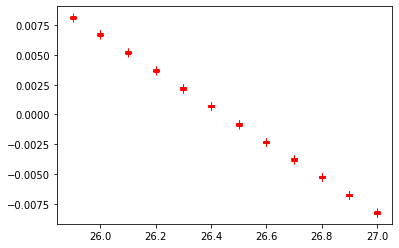

In [56]:
plt.plot(phi90['X'].values, phi90['Zfield_avg'].values, 'r+')

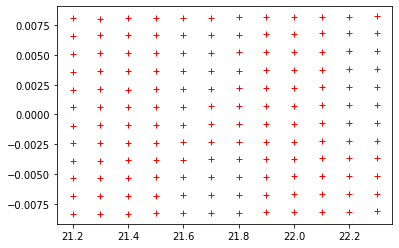

In [57]:
plt.plot(phi90['Y'].values, phi90['Zfield_avg'].values, 'r+')

Text(0.5, 1.0, 'phi0 xy plane field')

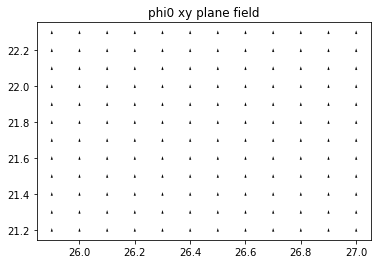

In [58]:
x = phi0['X']
y = phi0['Y']
z = [0]

x_field = phi0['Xfield_avg']
y_field = phi0['Yfield_avg']
z_field = phi0['Zfield_avg']

plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 10)
plt.title('phi0 xy plane field')
#fig = plt.figure()
#ax = fig.add_subplot(111, projection ='3d')
#ax.quiver(x_pts, y_pts, z_pts, x_field, y_field, z_field, length = 0.9)

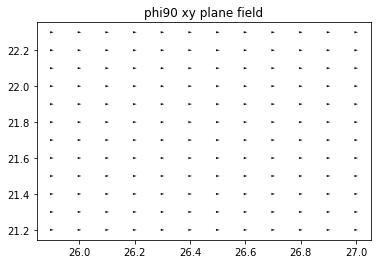

In [59]:
x = phi90['X']
y = phi90['Y']
z = [0]

x_field = phi90['Xfield_avg']
y_field = phi90['Yfield_avg']
z_field = phi90['Zfield_avg']
plt.title('phi90 xy plane field')
plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 10)

In [60]:
#Data variables dict
phi0_data_vars = {}
phi90_data_vars = {}

#Add (dims, data) tuple for each variable column to dict
for var in phi0.columns[:]:
    dims = ["Xpos", "Ypos"]
    data0 = phi0[var].values.reshape(x_pts.size, y_pts.size)
    phi0_data_vars[var] = (dims, data0)
    
for var in phi90.columns[:]:
    dims = ["Xpos", "Ypos"]
    data90 = phi90[var].values.reshape(x_pts.size, y_pts.size)
    phi90_data_vars[var] = (dims, data90)
    
coords = {"Xpos":('Xpos', x_pts), "Ypos":('Ypos', y_pts)}
phi0_ds = xr.Dataset(phi0_data_vars, coords)
phi90_ds = xr.Dataset(phi90_data_vars, coords)

In [61]:
phi0_ds.Yfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [62]:
phi90_ds.Xfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Xfield_avg)

In [63]:
phi0_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [64]:
phi90_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [65]:
combined_Z_field = (phi0_ds.Zfield_avg**2 + phi90_ds.Zfield_avg**2)

In [66]:
combined_Z_field.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [67]:
combined_Z_field.where(combined_Z_field == combined_Z_field.min(), drop=True)

<xarray.DataArray 'Zfield_avg' (Xpos: 1, Ypos: 1)>
array([[5.795044e-07]])
Coordinates:
  * Xpos     (Xpos) float64 26.4
  * Ypos     (Ypos) float64 21.7

In [68]:
combined_inplane = (phi0_ds.Yfield_avg**2 + phi90_ds.Xfield_avg**2)

In [69]:
combined_inplane.hvplot()

:Image   [Ypos,Xpos]   (value)

In [71]:
combined_inplane.where(combined_inplane == combined_inplane.max(), drop=True)

<xarray.DataArray (Xpos: 1, Ypos: 1)>
array([[0.024907]])
Coordinates:
  * Xpos     (Xpos) float64 26.5
  * Ypos     (Ypos) float64 21.6

### Centres: z field (26.4, 21.7), y field (26.5, 21.6) avg (27.45, 21.65)

In [73]:
zfield_x, zfield_y = 26.4, 21.7
yfield_x, yfield_y = 26.5, 21.6

In [74]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg, phi0_ds.Yfield_avg)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg, phi90_ds.Xfield_avg)
theta0_phi = np.arctan2(np.sqrt(phi0_ds.Xfield_avg**2 + phi0_ds.Yfield_avg**2), phi0_ds.Zfield_avg)
theta90_phi = np.arctan2(np.sqrt(phi90_ds.Xfield_avg**2 + phi90_ds.Yfield_avg**2), phi90_ds.Zfield_avg)

### Z field min

In [75]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))

phi0 : phi = -0.96
phi90 : phi = 0.99
phi0 : theta = 90.18
phi90 : theta = 89.65


### Y field max

In [76]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))

phi0 : phi = -0.93
phi90 : phi = 0.99
phi0 : theta = 89.43
phi90 : theta = 88.87


### Off by about 1$^\circ$ in both directions
Try again with smaller steps

In [78]:
x_start, x_end, x_step = 26.099, 26.7, 0.05
y_start, y_end, y_step = 21.4, 22, 0.05
x_pts = np.arange(x_start, x_end+x_step, x_step)
y_pts = np.arange(y_start, y_end+y_step, y_step)

In [79]:
phi0 = pd.read_csv('./2019-06-04/shims_rough_fieldRaster_2019-06-04_1.csv', comment='#')
phi90 = pd.read_csv('./2019-06-04/shims_rough_fieldRaster_2019-06-04_2.csv', comment='#')

In [80]:
#Data variables dict
phi0_data_vars = {}
phi90_data_vars = {}

#Add (dims, data) tuple for each variable column to dict
for var in phi0.columns[:]:
    dims = ["Xpos", "Ypos"]
    data0 = phi0[var].values.reshape(x_pts.size, y_pts.size)
    phi0_data_vars[var] = (dims, data0)
    
for var in phi90.columns[:]:
    dims = ["Xpos", "Ypos"]
    data90 = phi90[var].values.reshape(x_pts.size, y_pts.size)
    phi90_data_vars[var] = (dims, data90)
    
coords = {"Xpos":('Xpos', x_pts), "Ypos":('Ypos', y_pts)}
phi0_ds = xr.Dataset(phi0_data_vars, coords)
phi90_ds = xr.Dataset(phi90_data_vars, coords)

In [81]:
phi0_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [82]:
phi90_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [87]:
zcombined = phi90_ds.Zfield_avg**2 + phi0_ds.Zfield_avg**2
zcombined.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [88]:
zcombined.where(combined==combined.min(), drop=True)

<xarray.DataArray 'Zfield_avg' (Xpos: 1, Ypos: 1)>
array([[1.227591e-07]])
Coordinates:
  * Xpos     (Xpos) float64 26.45
  * Ypos     (Ypos) float64 21.75

In [95]:
inplane = (phi0_ds.Yfield_avg**2 + phi90_ds.Xfield_avg**2)
inplane.hvplot()

:Image   [Ypos,Xpos]   (value)

We seem to have 3 maximum points, third highest point agrees with z minima

In [93]:
inplane.where(combined==combined.max(), drop=True)

<xarray.DataArray (Xpos: 1, Ypos: 1)>
array([[0.024935]])
Coordinates:
  * Xpos     (Xpos) float64 26.75
  * Ypos     (Ypos) float64 21.4

In [96]:
a = inplane.where(combined < combined.max().values, drop=True)
a.where(a == a.max(), drop=True)
b = a.where(a < a.max().values, drop=True)
b.where(b == b.max(), drop=True)

<xarray.DataArray (Xpos: 1, Ypos: 1)>
array([[0.024971]])
Coordinates:
  * Xpos     (Xpos) float64 26.45
  * Ypos     (Ypos) float64 21.75

### Centres: z field (26.45, 21.75), y field (26.45, 21.75)

In [97]:
zfield_x, zfield_y = 26.45, 21.75

In [98]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg, phi0_ds.Yfield_avg)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg, phi90_ds.Xfield_avg)
theta0_phi = np.arctan2(np.sqrt(phi0_ds.Xfield_avg**2 + phi0_ds.Yfield_avg**2), phi0_ds.Zfield_avg)
theta90_phi = np.arctan2(np.sqrt(phi90_ds.Xfield_avg**2 + phi90_ds.Yfield_avg**2), phi90_ds.Zfield_avg)

In [99]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))

phi0 : phi = -0.90
phi90 : phi = 0.97
phi0 : theta = 89.42
phi90 : theta = 89.99


Pretty close in theta, off by about 1$^\circ$ in phi

### Finest Raster step = 0.02mm

In [106]:
x_start, x_end, x_step = 26.099, 26.7, 0.02
y_start, y_end, y_step = 21.4, 22, 0.02
x_pts = np.arange(x_start, x_end+x_step, x_step)
y_pts = np.arange(y_start, y_end+y_step, y_step)
phi0 = pd.read_csv('./2019-06-04/shims_rough_fieldRaster_2019-06-04_4.csv', comment='#')
phi90 = pd.read_csv('./2019-06-04/shims_rough_fieldRaster_2019-06-04_3.csv', comment='#')
#Data variables dict
phi0_data_vars = {}
phi90_data_vars = {}

#Add (dims, data) tuple for each variable column to dict
for var in phi0.columns[:]:
    dims = ["Xpos", "Ypos"]
    data0 = phi0[var].values.reshape(x_pts.size, y_pts.size)
    phi0_data_vars[var] = (dims, data0)
    
for var in phi90.columns[:]:
    dims = ["Xpos", "Ypos"]
    data90 = phi90[var].values.reshape(x_pts.size, y_pts.size)
    phi90_data_vars[var] = (dims, data90)
    
coords = {"Xpos":('Xpos', x_pts), "Ypos":('Ypos', y_pts)}
phi0_ds = xr.Dataset(phi0_data_vars, coords)
phi90_ds = xr.Dataset(phi90_data_vars, coords)

In [121]:
zcombined = phi90_ds.Zfield_avg**2 + phi0_ds.Zfield_avg**2
zcombined.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [123]:
zcombined.where(zcombined==zcombined.min(), drop=True)

<xarray.DataArray 'Zfield_avg' (Xpos: 1, Ypos: 1)>
array([[2.447581e-08]])
Coordinates:
  * Xpos     (Xpos) float64 26.42
  * Ypos     (Ypos) float64 21.76

In [124]:
inplane = (phi0_ds.Yfield_avg**2 + phi90_ds.Xfield_avg**2)
inplane.hvplot()

:Image   [Ypos,Xpos]   (value)

In [125]:
inplane.where(inplane==inplane.max(), drop=True)

<xarray.DataArray (Xpos: 1, Ypos: 1)>
array([[0.024978]])
Coordinates:
  * Xpos     (Xpos) float64 26.44
  * Ypos     (Ypos) float64 21.62

In [126]:
(21.62+21.76)/2

21.69